## Problem statement :

Bank XYZ has been observing a lot of customers closing their accounts or switching to competitor banks over the past couple of quarters. As such, this has caused a huge dent in the quarterly revenues and might drastically affect annual revenues for the ongoing financial year, causing stocks to plunge and market cap to reduce by X %. A team of business, product, engineering and data science folks have been put together to arrest this slide. 

__Objective__ : Can we build a model to predict, with a reasonable accuracy, the customers who are going to churn in the near future? Being able to accurately estimate when they are going to churn will be an added bonus

__Definition of churn__ : A customer having closed all their active accounts with the bank is said to have churned. Churn can be defined in other ways as well, based on the context of the problem. A customer not transacting for 6 months or 1 year can also be defined as to have churned, based on the business requirements 

__From a Biz team/Product Manager's perspective :__  

(1) Business goal : Arrest slide in revenues or loss of active bank customers

(2) Identify data source : Transactional systems, event-based logs, Data warehouse (MySQL DBs, Redshift/AWS), Data Lakes, NoSQL DBs

(3) Audit for data quality : De-duplication of events/transactions, Complete or partial absence of data for chunks of time in between, Obscuring PII (personal identifiable information) data 

(4) Define business and data-related metrics : Tracking of these metrics over time, probably through some intuitive visualizations
    
    (i) Business metrics : Churn rate (month-on-month, weekly/quarterly), Trend of avg. number of products per customer, 
        %age of dormant customers, Other such descriptive metrics
    
    (ii) Data-related metrics : F1-score, Recall, Precision
         Recall = TP/(TP + FN) 
         Precision = TP/(TP + FP)
         F1-score = Harmonic mean of Recall and Precision
         where, TP = True Positive, FP = False Positive and FN = False Negative

(5) Prediction model output format : Since this is not going to be an online model, it doesn't require deployment. Instead, periodic (monthly/quarterly) model runs could be made and the list of customers, along with their propensity to churn shared with the business (Sales/Marketing) or Product team

(6) Action to be taken based on model's output/insights : Based on the output obtained from Data Science team as above, various business interventions can be made to save the customer from getting churned. Customer-centric bank offers, getting in touch with customers to address grievances etc. Here, also Data Science team can help with basic EDA to highlight different customer groups/segments and the appropriate intervention to be applied against them

__Collaboration with Engineering and DevOps :__  

(1) Application deployment on production servers (In the context of this problem statement, not required)

(2) [DevOps] Monitoring the scale aspects of model performance over time (Again, not required, in this case)

<img src="org_interactions.png">

### How to set the target/goal for the metrics?

* Data science-related metrics :
    - Recall : >70%
    - Precision : >70%
    - F1-score : >70%


* Business metrics : Usually, it's top down. But a good practice is to consider it to make atleast half the impact of the data science metric. For e.g., If we take Recall target as __70%__ which means correctly identifying 70% of customers who's going to churn in the near future, we can expect that due to business intervention (offers, getting in touch with customers etc.), 50% of the customers can be saved from being churned, which means atleast a __35%__ improvement in Churn Rate

## Show me the code


In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
## Reading the dataset
# This might be present in S3, or obtained through a query on a database
df = pd.read_csv("Churn_Modelling.csv")

In [6]:
df.shape

(10000, 14)

In [7]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
RowNumber,1,2,3,4,5,6,7,8,9,10
CustomerId,15634602,15647311,15619304,15701354,15737888,15574012,15592531,15656148,15792365,15592389
Surname,Hargrave,Hill,Onio,Boni,Mitchell,Chu,Bartlett,Obinna,He,H?
CreditScore,619,608,502,699,850,645,822,376,501,684
Geography,France,Spain,France,France,Spain,Spain,France,Germany,France,France
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male
Age,42,41,42,39,43,44,50,29,44,27
Tenure,2,1,8,1,2,8,7,4,4,2
Balance,0.0,83807.86,159660.8,0.0,125510.82,113755.78,0.0,115046.74,142051.07,134603.88
NumOfProducts,1,1,3,2,1,2,2,4,2,1


## Exploratory Data Analysis

In [8]:
df.describe() # Describe all numerical columns
df.describe(include = ['O'])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [9]:
## Checking number of unique customers in the dataset
df.shape[0], df.CustomerId.nunique()

(10000, 10000)

In [10]:
df_t = df.groupby(['Surname']).agg({'RowNumber':'count', 'Exited':'mean'}
                                  ).reset_index().sort_values(by='RowNumber', ascending=False)

In [11]:
df_t.head()

,Surname,RowNumber,Exited
2473,Smith,32,0.281250
1689,Martin,29,0.310345
2389,Scott,29,0.103448
2751,Walker,28,0.142857
336,Brown,26,0.192308


In [12]:
df.Geography.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

## Conclusion

 - Discard row number
 - Discard CustomerID as well, since it doesn't convey any extra info. Each row pertains to a unique customer
 - Based on the above, columns/features can be segregated into non-essential, numerical, categorical and target variables
 
In general, CustomerID is a very useful feature on the basis of which we can calculate a lot of user-centric features. Here, the dataset is not sufficient to calculate any extra customer features

In [13]:
# Separating out different columns into various categories as defined above
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId']
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

Among these, Tenure and NumOfProducts are ordinal variables. HasCrCard and IsActiveMember are actually binary categorical variables.

In [14]:
## Separating out target variable and removing the non-essential columns
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

### Questioning the data :

 - No date/time column. A lot of useful features can be built using date/time columns
 - When was the data snapshot taken? There are certain customer features like : Balance, Tenure, NumOfProducts, EstimatedSalary, which will have different values across time
 - Are all these values/features pertaining to the same single date or spread across multiple dates?
 - How frequently are customer features updated?
 - Will it be possible to have the values of these features over a period of time as opposed to a single, snapshot date?
 - Some customers who have exited still have balance in their account, or a non-zero NumOfProducts. Does this mean they have churned only from a specific product and not the entire bank, or are these snapshots of just before they churned?
 - Some features like, number and kind of transactions, can help us estimate the degree of activity of the customer, instead of trusting the binary variable IsActiveMember
 - Customer transaction patterns can also help us ascertain whether the customer has actually churned or not. For example, a customer might transact daily/weekly vs a customer who transacts annuallly
 
 Here, the objective is to understand the data and distill the problem statement and the stated goal further. In the process, if more data/context can be obtained, that adds to the end result of the model performance

In [15]:
# Separating out train-test-valid sets

Since this is the only data available to us, we keep aside a holdout/test set to evaluate our model at the very end in order to estimate our chosen model's performance on unseen data / new data.

A validation set is also created which we'll use in our baseline models to evaluate and tune our models

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
## Keeping aside a test/holdout set
df_train_val, df_test, y_train_val, y_test = train_test_split(df, y.ravel(), test_size = 0.1, random_state = 42)

## Splitting into train and validation set
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size = 0.12, random_state = 42)

In [18]:
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape
np.mean(y_train), np.mean(y_val), np.mean(y_test)

((7920, 12), (1080, 12), (1000, 12), (7920,), (1080,), (1000,))

(0.20303030303030303, 0.22037037037037038, 0.191)

### Univariate plots of numerical variables in training set

<Axes: ylabel='CreditScore'>

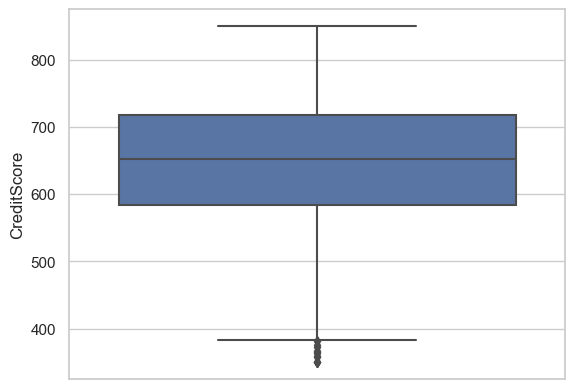

In [19]:
## CreditScore
sns.set(style="whitegrid")
sns.boxplot(y = df_train['CreditScore'])

<Axes: ylabel='Age'>

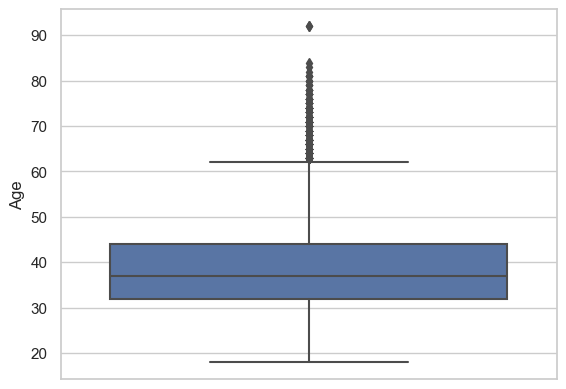

In [20]:
## Age
sns.boxplot(y = df_train['Age'])

<Axes: ylabel='Tenure'>

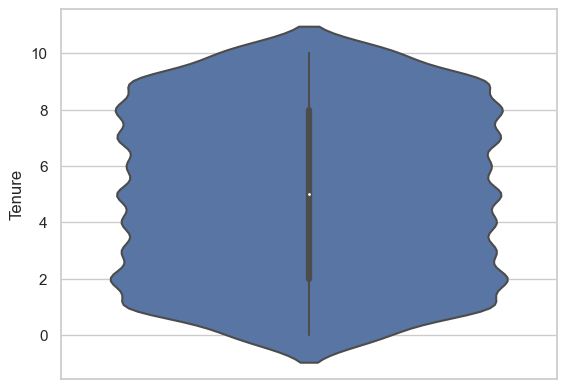

In [21]:
## Tenure
sns.violinplot(y = df_train.Tenure)

<Axes: ylabel='Balance'>

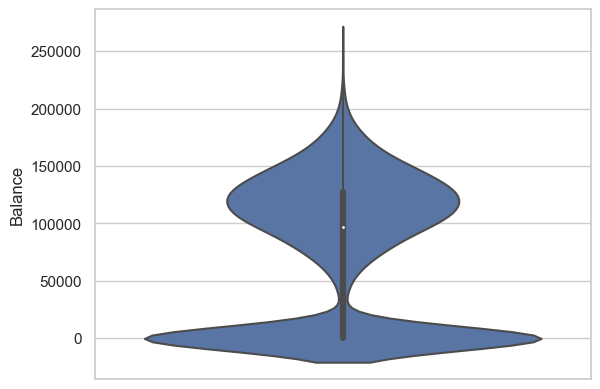

In [22]:
## Balance
sns.violinplot(y = df_train['Balance'])

<Axes: xlabel='NumOfProducts'>

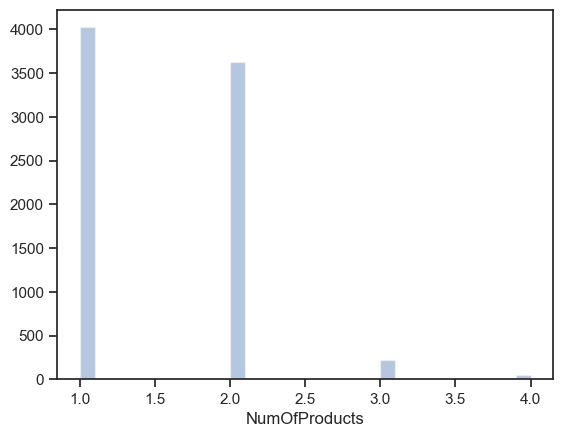

In [23]:
## NumOfProducts
sns.set(style = 'ticks')
sns.distplot(df_train.NumOfProducts, hist=True, kde=False)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

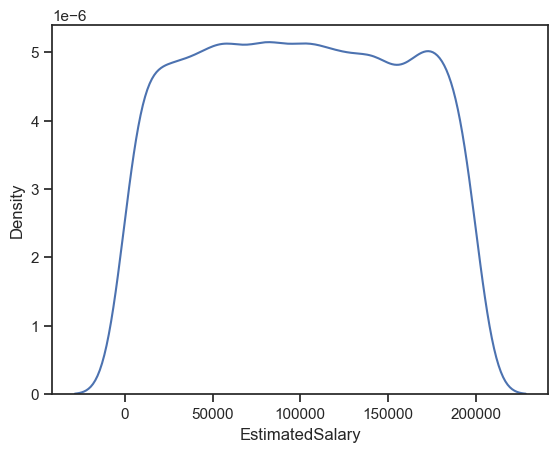

In [24]:
## EstimatedSalary
sns.kdeplot(df_train.EstimatedSalary)

 - From the univariate plots, we get an indication that _EstimatedSalary_ , being uniformly distributed, might not turn out to be an important predictor 
 - Similarly, for _NumOfProducts_ , there are predominantly only two values (1 and 2). Hence, its chances of being a strong predictor is also very unlikely
 - On the other hand, _Balance_ has a multi-modal distribution. We'll see a little later if that helps in separation of the two target classes

### Missing values and outlier treatment

* Can be observed from univariate plots of different features

* Outliers can either be logically improbable (as per the feature definition) or just an extreme value as compared to the feature distribution

* As part of outlier treatment, the particular row containing the outlier can be removed from the training set, provided they do not form a significant chunk of the dataset (< 0.5-1%)

* In cases where the value of outlier is logically faulty, e.g. negative Age or CreditScore > 900, the particular record can be replaced with mean of the feature or the nearest among min/max logical value of the feature 

Outliers in numerical features can be of a very high/low value, lying in the top 1% or bottom 1% of the distribution or values which are not possible as per the feature definition.

Outliers in categorical features are usually levels with a very low frequency/no. of samples as compared to other categorical levels.

__No outliers observed in any feature of this dataset__

##### Is outlier treatment always required ?

No, Not all ML algorithms are sensitive to outliers. Algorithms like linear/logistic regression are sensitive to outliers.

Tree algorithms, kNN, clustering algorithms etc. are in general, robust to outliers

Outliers affect metrics such as mean, std. deviation

#### Missing values

In [26]:
## No missing values!
df_train.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values present in this dataset. Can also be observed from df.describe() commands. However, most real-world datasets might have missing values. A couple of things which can be done in such cases :
 - If the column/feature has too many missing values, it can be dropped as it might not add much relevance to the data
 - If there a few missing values, the column/feature can be imputed with its summary statistics (mean/median/mode) and/or numbers like 0, -1 etc. which add value depending on the data and context. For example, say, BalanceInAccount.

In [27]:
## Making all changes in a temporary dataframe
df_missing = df_train.copy()

In [28]:
## Modify few records to add missing values/outliers

# Introducing 10% nulls in Age
na_idx = df_missing.sample(frac = 0.1).index
df_missing.loc[na_idx, 'Age'] = np.NaN

# Introducing 30% nulls in Geography
na_idx = df_missing.sample(frac = 0.3).index
df_missing.loc[na_idx, 'Geography'] = np.NaN

# Introducing 5% nulls in HasCrCard
na_idx = df_missing.sample(frac = 0.05).index
df_missing.loc[na_idx, 'HasCrCard'] = np.NaN

In [29]:
df_missing.isnull().sum()/df_missing.shape[0]

Surname            0.00
CreditScore        0.00
Geography          0.30
Gender             0.00
Age                0.10
Tenure             0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.05
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

In [30]:
## Calculating mean statistics
age_mean = df_missing.Age.mean()

In [31]:
age_mean

38.89772727272727

In [32]:
# Filling nulls in Age by mean value (numeric column)

#df_missing.Age.fillna(age_mean, inplace=True)

df_missing['Age'] = df_missing.Age.apply(lambda x: int(np.random.normal(age_mean,3)) if np.isnan(x) else x)

<Axes: xlabel='Age', ylabel='Density'>

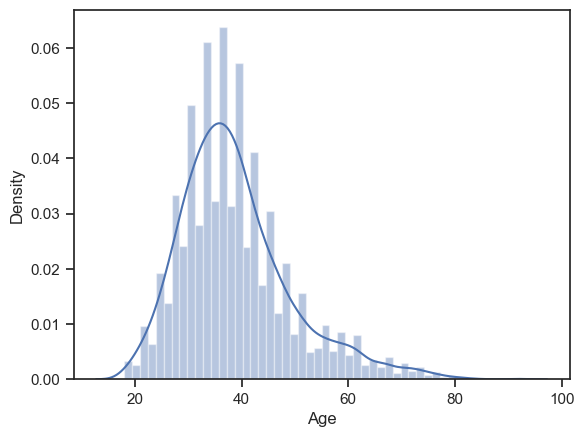

In [33]:
## Distribution of "Age" feature before data imputation
sns.distplot(df_train.Age)

<Axes: xlabel='Age', ylabel='Density'>

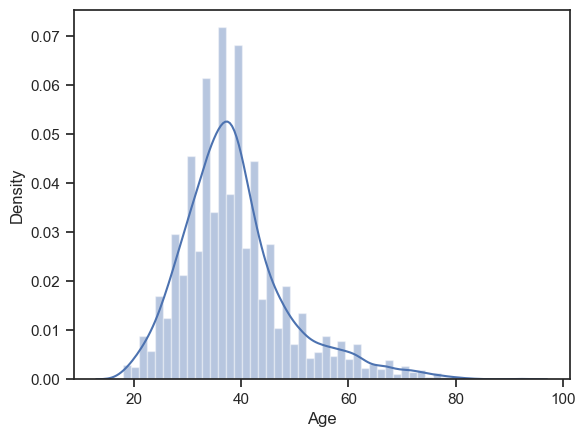

In [34]:
## Distribution of "Age" feature after data imputation
sns.distplot(df_missing.Age)

In [35]:
# Filling nulls in Geography (categorical feature with a high %age of missing values)
geog_fill_value = 'UNK'
df_missing.Geography.fillna(geog_fill_value, inplace=True)

# Filling nulls in HasCrCard (boolean feature) - 0 for few nulls, -1 for lots of nulls
df_missing.HasCrCard.fillna(0, inplace=True)

In [36]:
df_missing.Geography.value_counts(normalize=True)

France     0.351894
UNK        0.300000
Spain      0.177146
Germany    0.170960
Name: Geography, dtype: float64

In [37]:
df_missing.isnull().sum()/df_missing.shape[0]

Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

### Categorical variable encoding

As a rule of thumb, we can consider using :

 1. Label Encoding ---> Binary categorical variables and Ordinal variables
 2. One-Hot Encoding ---> Non-ordinal categorical variables with low to mid cardinality (< 5-10 levels)
 3. Target encoding ---> Categorical variables with > 10 levels



* HasCrCard and IsActiveMember are already label encoded
* For Gender, a simple Label encoding should be fine.
* For Geography, since there are 3 levels, OneHotEncoding should do the trick
* For Surname, we'll try Target/Frequency Encoding

#### Label Encoding for binary variables

In [38]:
## The non-sklearn method
df_train['Gender_cat'] = df_train.Gender.astype('category').cat.codes

In [39]:
df_train.sample(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_cat
9344,Barrett,727,France,Female,28,2,110997.76,1,1,0,101433.76,0,0
4175,Baryshnikov,741,Spain,Male,43,0,0.00,2,1,1,2920.63,1,1
6825,Ignatyeva,529,Spain,Female,44,1,0.00,2,0,0,14161.30,0,0
7109,Sims,670,France,Female,39,8,101928.51,1,0,0,89205.54,0,0
8286,Plummer,632,Spain,Male,28,7,155519.59,1,1,0,1843.24,0,1
6737,Barnes,715,Spain,Male,38,2,96798.79,2,1,1,4554.67,0,1
6208,Manfrin,714,France,Male,34,10,0.00,2,1,1,80234.14,0,1
4044,Parkin,658,France,Male,32,8,0.00,1,1,1,80410.68,0,1
3220,Bidwill,576,Germany,Male,30,7,132174.41,2,0,0,93767.03,0,1
2944,Goddard,576,France,Male,32,7,0.00,2,1,0,4660.91,0,1


In [40]:
df_train.drop('Gender_cat', axis=1, inplace = True)

In [41]:
## The sklearn method
from sklearn.preprocessing import LabelEncoder

We fit only on train dataset as that's the only data we'll assume we have. We'll treat validation and test sets as unseen data. Hence, they can't be used for fitting the encoders.

In [43]:
le = LabelEncoder()

In [44]:
## Label encoding of Gender variable
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [45]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
le_name_mapping

{'Female': 0, 'Male': 1}

In [46]:
## What if Gender column has new values in test or val set?
le.transform([['Male']])
#le.transform([['ABC']])

array([1])

In [47]:
pd.Series(['ABC']).map(le_name_mapping)

0   NaN
dtype: float64

In [48]:
## Encoding Gender feature for validation and test set
df_val['Gender'] = df_val.Gender.map(le_name_mapping)
df_test['Gender'] = df_test.Gender.map(le_name_mapping)

## Filling missing/NaN values created due to new categorical levels
df_val['Gender'].fillna(-1, inplace=True)
df_test['Gender'].fillna(-1, inplace=True)

In [49]:
df_train.Gender.unique(), df_val.Gender.unique(), df_test.Gender.unique()

(array([1, 0]), array([1, 0]), array([1, 0]))

#### One-Hot encoding for categorical variables with multiple levels

In [50]:
## The non-sklearn method
t = pd.get_dummies(df_train, prefix_sep = "_", columns = ['Geography'])
t.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4562,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0,1,0
6498,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1,0,0
6072,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1,0,0
5813,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1,0,0
7407,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1,0,0


In [51]:
### Dropping dummy column
t.drop(['Geography_France'], axis=1, inplace=True)
t.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
4562,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,1,0
6498,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,0,0
6072,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,0,0
5813,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,0,0
7407,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,0,0


In [52]:
## The sklearn method
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [53]:
le_ohe = LabelEncoder()
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse=False)

In [54]:
enc_train = le_ohe.fit_transform(df_train.Geography).reshape(df_train.shape[0],1)
enc_train.shape
np.unique(enc_train)

(7920, 1)

array([0, 1, 2])

In [55]:
ohe_train = ohe.fit_transform(enc_train)
ohe_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [56]:
le_ohe_name_mapping = dict(zip(le_ohe.classes_, le_ohe.transform(le_ohe.classes_)))
le_ohe_name_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [57]:
## Encoding Geography feature for validation and test set
enc_val = df_val.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)
enc_test = df_test.Geography.map(le_ohe_name_mapping).ravel().reshape(-1,1)

## Filling missing/NaN values created due to new categorical levels
enc_val[np.isnan(enc_val)] = 9999
enc_test[np.isnan(enc_test)] = 9999

In [58]:
np.unique(enc_val)
np.unique(enc_test)

array([0, 1, 2])

array([0, 1, 2])

In [59]:
ohe_val = ohe.transform(enc_val)
ohe_test = ohe.transform(enc_test)

In [60]:
### Show what happens when a new value is inputted into the OHE 
ohe.transform(np.array([[9999]]))

array([[0., 0., 0.]])

#### Adding the one-hot encoded columns to the dataframe and removing the original feature

In [61]:
cols = ['country_' + str(x) for x in le_ohe_name_mapping.keys()]
cols

['country_France', 'country_Germany', 'country_Spain']

In [62]:
## Adding to the respective dataframes
df_train = pd.concat([df_train.reset_index(), pd.DataFrame(ohe_train, columns = cols)], axis = 1).drop(['index'], axis=1)
df_val = pd.concat([df_val.reset_index(), pd.DataFrame(ohe_val, columns = cols)], axis = 1).drop(['index'], axis=1)
df_test = pd.concat([df_test.reset_index(), pd.DataFrame(ohe_test, columns = cols)], axis = 1).drop(['index'], axis=1)

In [63]:
print("Training set")
df_train.head()
print("\n\nValidation set")
df_val.head()
print("\n\nTest set")
df_test.head()

Training set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Yermakova,678,Germany,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0
1,Warlow-Davies,613,France,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0
2,Fu,628,France,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0
3,Shih,513,France,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0
4,Mahmood,639,France,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0




Validation set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Sun,757,France,1,36,7,144852.06,1,0,0,130861.95,0,1.0,0.0,0.0
1,Russo,552,France,1,29,10,0.00,2,1,0,12186.83,0,1.0,0.0,0.0
2,Munro,619,France,0,30,7,70729.17,1,1,1,160948.87,0,1.0,0.0,0.0
3,Perkins,633,France,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0
4,Aliyeva,698,Spain,1,38,10,95010.92,1,1,1,105227.86,0,0.0,0.0,1.0




Test set


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Anderson,596,Germany,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0
1,Herring,623,France,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0
2,Amechi,601,Spain,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0
3,Liang,506,Germany,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0
4,Chuang,560,Spain,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0


In [64]:
## Drop the Geography column
df_train.drop(['Geography'], axis = 1, inplace=True)
df_val.drop(['Geography'], axis = 1, inplace=True)
df_test.drop(['Geography'], axis = 1, inplace=True)

#### Target encoding

Target encoding is generally useful when dealing with categorical variables of high cardinality (high number of levels).

Here, we'll encode the column 'Surname' (which has 2932 different values!) with the mean of target variable for that level

In [65]:
df_train.head()

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0


In [66]:
means = df_train.groupby(['Surname']).Exited.mean()
means.head()

Surname
Abazu       0.00
Abbie       0.00
Abbott      0.25
Abdullah    1.00
Abdulov     0.00
Name: Exited, dtype: float64

In [67]:
global_mean = y_train.mean()
global_mean

0.20303030303030303

In [71]:
## Creating new encoded features for surname - Target (mean) encoding
df_train['Surname_mean_churn'] = df_train.Surname.map(means)
df_train['Surname_mean_churn'].fillna(global_mean, inplace=True)

But, the problem with Target encoding is that it might cause data leakage, as we are considering feedback from the target variable while computing any summary statistic.

A solution is to use a modified version : Leave-one-out Target encoding.

In this, for a particular data point or row, the mean of the target is calculated by considering all rows in the same categorical level except itself. This mitigates data leakage and overfitting to some extent.

Mean for a category, __m<sub>c</sub> = S<sub>c</sub> / n<sub>c</sub>__    .....   (1)

What we need to find is the mean excluding a single sample. This can be expressed as : __m<sub>i</sub> = (S<sub>c</sub> - t<sub>i</sub>) / (n<sub>c</sub> - 1)__     .....   (2)

Using (1) and (2), we can get : __m<sub>i</sub> = (n<sub>c</sub>m<sub>c</sub> - t<sub>i</sub>) / (n<sub>c</sub> - 1)__

Here, _S<sub>c</sub>_ = Sum of target variable for category c

_n<sub>c</sub>_ = Number of rows in category c   

_t<sub>i</sub>_ = Target value of the row whose encoding is being calculated


In [72]:
## Calculate frequency of each category
freqs = df_train.groupby(['Surname']).size()
freqs.head()

Surname
Abazu       2
Abbie       1
Abbott      4
Abdullah    1
Abdulov     1
dtype: int64

In [73]:
## Create frequency encoding - Number of instances of each category in the data
df_train['Surname_freq'] = df_train.Surname.map(freqs)
df_train['Surname_freq'].fillna(0, inplace=True)

In [74]:
## Create Leave-one-out target encoding for Surname
df_train['Surname_enc'] = ((df_train.Surname_freq * df_train.Surname_mean_churn) - df_train.Exited)/(df_train.Surname_freq - 1)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_freq,Surname_mean_churn,Surname_enc
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,4,0.000000,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,2,0.000000,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,10,0.200000,0.222222
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,21,0.285714,0.300000
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,3,0.333333,0.500000
5,Miller,562,1,30,3,111099.79,2,0,0,140650.19,0,1.0,0.0,0.0,14,0.285714,0.307692
6,Padovesi,635,1,43,5,78992.75,2,0,0,153265.31,0,0.0,1.0,0.0,10,0.200000,0.222222
7,Edments,705,1,33,7,68423.89,1,1,1,64872.55,0,0.0,0.0,1.0,1,0.000000,NaN
8,Chan,694,1,42,8,133767.19,1,1,0,36405.21,0,1.0,0.0,0.0,3,0.000000,0.000000
9,Matthews,711,1,26,9,128793.63,1,1,0,19262.05,0,0.0,1.0,0.0,4,0.000000,0.000000


In [75]:
## Fill NaNs occuring due to category frequency being 1 or less
df_train['Surname_enc'].fillna((((df_train.shape[0] * global_mean) - df_train.Exited) / (df_train.shape[0] - 1)), inplace=True)
df_train.head(10)

,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_freq,Surname_mean_churn,Surname_enc
0,Yermakova,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,4,0.000000,0.000000
1,Warlow-Davies,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,2,0.000000,0.000000
2,Fu,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,10,0.200000,0.222222
3,Shih,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,21,0.285714,0.300000
4,Mahmood,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,3,0.333333,0.500000
5,Miller,562,1,30,3,111099.79,2,0,0,140650.19,0,1.0,0.0,0.0,14,0.285714,0.307692
6,Padovesi,635,1,43,5,78992.75,2,0,0,153265.31,0,0.0,1.0,0.0,10,0.200000,0.222222
7,Edments,705,1,33,7,68423.89,1,1,1,64872.55,0,0.0,0.0,1.0,1,0.000000,0.203056
8,Chan,694,1,42,8,133767.19,1,1,0,36405.21,0,1.0,0.0,0.0,3,0.000000,0.000000
9,Matthews,711,1,26,9,128793.63,1,1,0,19262.05,0,0.0,1.0,0.0,4,0.000000,0.000000


On validation and test set, we'll apply the normal Target encoding mapping as obtained from the training set

In [76]:
## Replacing by category means and new category levels by global mean
df_val['Surname_enc'] = df_val.Surname.map(means)
df_val['Surname_enc'].fillna(global_mean, inplace=True)

df_test['Surname_enc'] = df_test.Surname.map(means)
df_test['Surname_enc'].fillna(global_mean, inplace=True)

In [77]:
## Show that using LOO Target encoding decorrelates features
df_train[['Surname_mean_churn', 'Surname_enc', 'Exited']].corr()

,Surname_mean_churn,Surname_enc,Exited
Surname_mean_churn,1.000000,0.54823,0.562677
Surname_enc,0.548230,1.00000,-0.026440
Exited,0.562677,-0.02644,1.000000


In [78]:
### Deleting the 'Surname' and other redundant column across the three datasets
df_train.drop(['Surname_mean_churn'], axis=1, inplace=True)
df_train.drop(['Surname_freq'], axis=1, inplace=True)
df_train.drop(['Surname'], axis=1, inplace=True)
df_val.drop(['Surname'], axis=1, inplace=True)
df_test.drop(['Surname'], axis=1, inplace=True)

In [79]:
df_train.head()
df_val.head()
df_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,757,1,36,7,144852.06,1,0,0,130861.95,0,1.0,0.0,0.0,0.111111
1,552,1,29,10,0.00,2,1,0,12186.83,0,1.0,0.0,0.0,0.200000
2,619,0,30,7,70729.17,1,1,1,160948.87,0,1.0,0.0,0.0,0.500000
3,633,1,35,10,0.00,2,1,0,65675.47,0,1.0,0.0,0.0,0.000000
4,698,1,38,10,95010.92,1,1,1,105227.86,0,0.0,0.0,1.0,1.000000


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
0,596,1,32,3,96709.07,2,0,0,41788.37,0,0.0,1.0,0.0,0.083333
1,623,1,43,1,0.00,2,1,1,146379.30,0,1.0,0.0,0.0,0.203030
2,601,0,44,4,0.00,2,1,0,58561.31,0,0.0,0.0,1.0,0.333333
3,506,1,59,8,119152.10,2,1,1,170679.74,0,0.0,1.0,0.0,0.153846
4,560,0,27,7,124995.98,1,1,1,114669.79,0,0.0,0.0,1.0,0.230769


#### _Summarize_ : How to handle unknown categorical levels/values in unseen data in production?

 - Use LabelEncoding, OneHotEncoding on training set and then save the mapping and apply on the test set. For missing values, use 0, -1 etc.
 
 - Target/Frequency encoding : Create a mapping between each level and a statistical measure (mean, median, sum etc.) of the target from the training dataset. For the new categorical levels, impute the missing values suitably (can be 0, -1, or mean/mode/median)
 
 - Leave-one-out or Cross fold Target encoding avoid data leakage and help in generalization of the model

### Bivariate analysis


In [80]:
## Check linear correlation (rho) between individual features and the target variable
corr = df_train.corr()
corr

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc
CreditScore,1.000000,0.000354,0.002099,0.005994,-0.001507,0.014110,-0.011868,0.035057,0.000358,-0.028117,-0.009481,0.003393,0.007561,-0.000739
Gender,0.000354,1.000000,-0.024446,0.010749,0.009380,-0.026795,0.007550,0.028094,-0.011007,-0.102331,0.000823,-0.018412,0.017361,0.008002
Age,0.002099,-0.024446,1.000000,-0.011384,0.027721,-0.033305,-0.019633,0.093573,-0.006827,0.288221,-0.038881,0.048764,-0.003648,-0.010844
Tenure,0.005994,0.010749,-0.011384,1.000000,-0.013081,0.018231,0.026148,-0.021263,0.010145,-0.010660,0.000021,-0.003131,0.003090,-0.006753
Balance,-0.001507,0.009380,0.027721,-0.013081,1.000000,-0.304318,-0.021464,-0.008085,0.027247,0.113377,-0.231770,0.405616,-0.136044,0.006925
NumOfProducts,0.014110,-0.026795,-0.033305,0.018231,-0.304318,1.000000,0.007202,0.014809,0.009769,-0.039200,0.002991,-0.015926,0.012388,-0.002020
HasCrCard,-0.011868,0.007550,-0.019633,0.026148,-0.021464,0.007202,1.000000,-0.006526,-0.008413,-0.013659,0.005881,0.008197,-0.014934,-0.000551
IsActiveMember,0.035057,0.028094,0.093573,-0.021263,-0.008085,0.014809,-0.006526,1.000000,-0.016446,-0.152477,0.002126,-0.020570,0.018003,0.004902
EstimatedSalary,0.000358,-0.011007,-0.006827,0.010145,0.027247,0.009769,-0.008413,-0.016446,1.000000,0.015881,-0.004512,0.010583,-0.005320,-0.009899
Exited,-0.028117,-0.102331,0.288221,-0.010660,0.113377,-0.039200,-0.013659,-0.152477,0.015881,1.000000,-0.106006,0.173492,-0.050264,-0.026440


<Axes: >

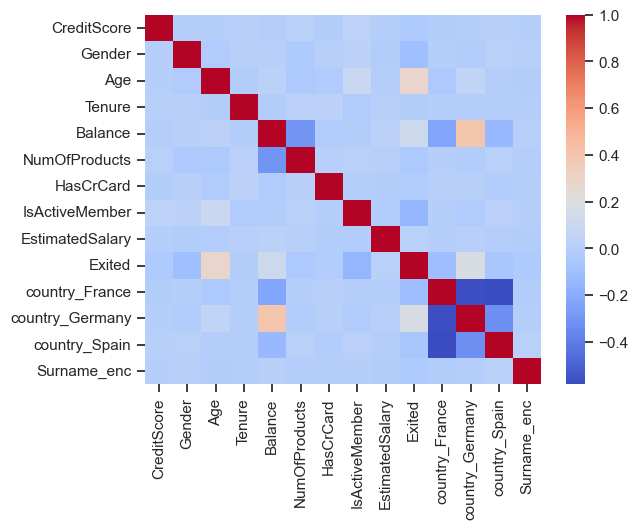

In [81]:
sns.heatmap(corr, cmap = 'coolwarm')

None of the features are highly correlated with the target variable. But some of them have slight linear associations with the target variable.

* Continuous features - Age, Balance 

* Categorical variables - Gender, IsActiveMember, country_Germany, country_France

#### Individual features versus their distibution across target variable values

<Axes: xlabel='Exited', ylabel='Age'>

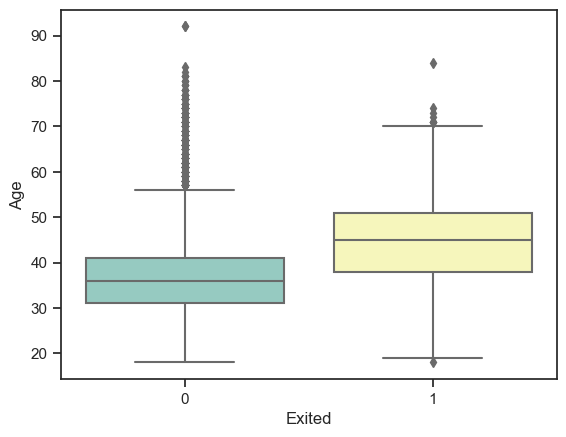

In [82]:
sns.boxplot(x = "Exited", y = "Age", data = df_train, palette="Set3")

<Axes: xlabel='Exited', ylabel='Balance'>

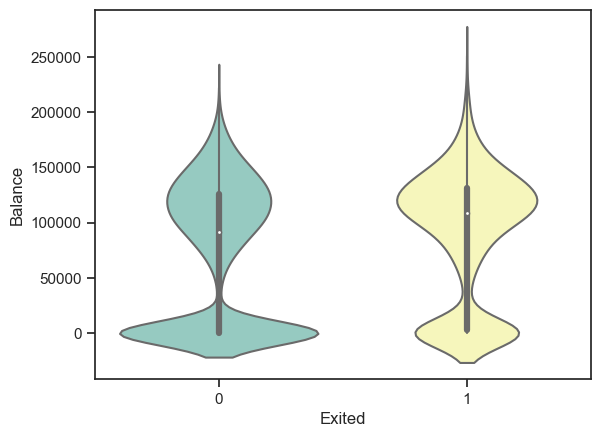

In [83]:
sns.violinplot(x = "Exited", y = "Balance", data = df_train, palette="Set3")

In [84]:
# Check association of categorical features with target variable
cat_vars_bv = ['Gender', 'IsActiveMember', 'country_Germany', 'country_France']

for col in cat_vars_bv:
    df_train.groupby([col]).Exited.mean()

Gender
0    0.248191
1    0.165511
Name: Exited, dtype: float64

IsActiveMember
0    0.266285
1    0.143557
Name: Exited, dtype: float64

country_Germany
0.0    0.163091
1.0    0.324974
Name: Exited, dtype: float64

country_France
0.0    0.245877
1.0    0.160593
Name: Exited, dtype: float64

In [85]:
col = 'NumOfProducts'
df_train.groupby([col]).Exited.mean()
df_train[col].value_counts()

NumOfProducts
1    0.273428
2    0.076881
3    0.825112
4    1.000000
Name: Exited, dtype: float64

1    4023
2    3629
3     223
4      45
Name: NumOfProducts, dtype: int64

In [86]:
### Some basic feature engineering

In [87]:
df_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc'],
      dtype='object')

Creating some new features based on simple interactions between the existing features.

* Balance/NumOfProducts
* Balance/EstimatedSalary
* Tenure/Age
* Age * Surname_enc

In [88]:
eps = 1e-6

df_train['bal_per_product'] = df_train.Balance/(df_train.NumOfProducts + eps)
df_train['bal_by_est_salary'] = df_train.Balance/(df_train.EstimatedSalary + eps)
df_train['tenure_age_ratio'] = df_train.Tenure/(df_train.Age + eps)
df_train['age_surname_mean_churn'] = np.sqrt(df_train.Age) * df_train.Surname_enc

In [89]:
df_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,country_France,country_Germany,country_Spain,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,678,1,36,1,117864.85,2,1,0,27619.06,0,0.0,1.0,0.0,0.000000,58932.395534,4.267519,0.027778,0.000000
1,613,0,27,5,125167.74,1,1,0,199104.52,0,1.0,0.0,0.0,0.000000,125167.614832,0.628653,0.185185,0.000000
2,628,1,45,9,0.00,2,1,1,96862.56,0,1.0,0.0,0.0,0.222222,0.000000,0.000000,0.200000,1.490712
3,513,1,30,5,0.00,2,1,0,162523.66,0,1.0,0.0,0.0,0.300000,0.000000,0.000000,0.166667,1.643168
4,639,1,22,4,0.00,2,1,0,28188.96,0,1.0,0.0,0.0,0.500000,0.000000,0.000000,0.181818,2.345208


In [90]:
new_cols = ['bal_per_product','bal_by_est_salary','tenure_age_ratio','age_surname_mean_churn']

In [91]:
## Ensuring that the new column doesn't have any missing values
df_train[new_cols].isnull().sum()

bal_per_product           0
bal_by_est_salary         0
tenure_age_ratio          0
age_surname_mean_churn    0
dtype: int64

<Axes: >

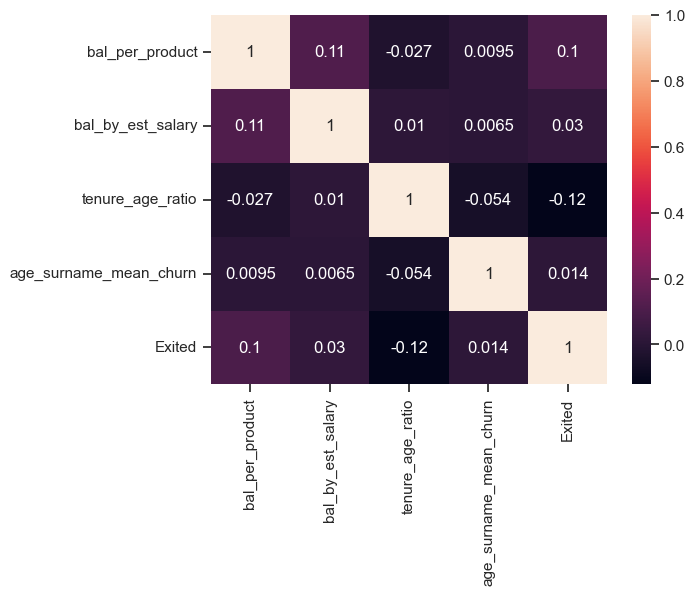

In [92]:
## Linear association of new columns with target variables to judge importance
sns.heatmap(df_train[new_cols + ['Exited']].corr(), annot=True)

Out of the new features, ones with slight linear association/correlation are : bal_per_product and tenure_age_ratio

In [93]:
## Creating new interaction feature terms for validation set
eps = 1e-6

df_val['bal_per_product'] = df_val.Balance/(df_val.NumOfProducts + eps)
df_val['bal_by_est_salary'] = df_val.Balance/(df_val.EstimatedSalary + eps)
df_val['tenure_age_ratio'] = df_val.Tenure/(df_val.Age + eps)
df_val['age_surname_mean_churn'] = np.sqrt(df_val.Age) * df_val.Surname_enc

In [94]:
## Creating new interaction feature terms for test set
eps = 1e-6

df_test['bal_per_product'] = df_test.Balance/(df_test.NumOfProducts + eps)
df_test['bal_by_est_salary'] = df_test.Balance/(df_test.EstimatedSalary + eps)
df_test['tenure_age_ratio'] = df_test.Tenure/(df_test.Age + eps)
df_test['age_surname_mean_churn'] = np.sqrt(df_test.Age) * df_test.Surname_enc

### Feature scaling and normalization
Different methods :

1. Feature transformations - Using log, log10, sqrt, pow
2. MinMaxScaler - Brings all feature values between 0 and 1
3. StandardScaler - Mean normalization. Feature values are an estimate of their z-score


* Why is scaling and normalization required ?


* How do we normalize unseen data?

#### Feature transformations

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

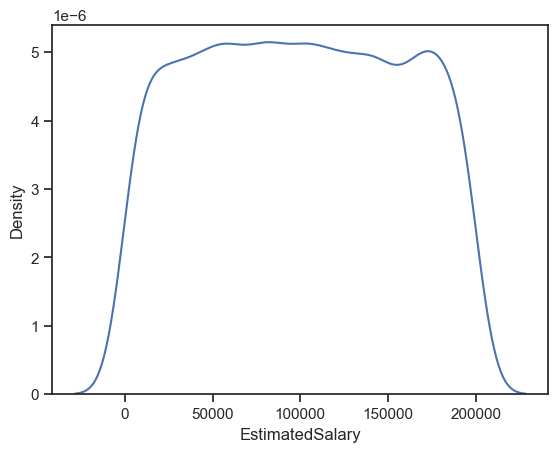

In [95]:
### Demo-ing feature transformations
sns.distplot(df_train.EstimatedSalary, hist=False)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

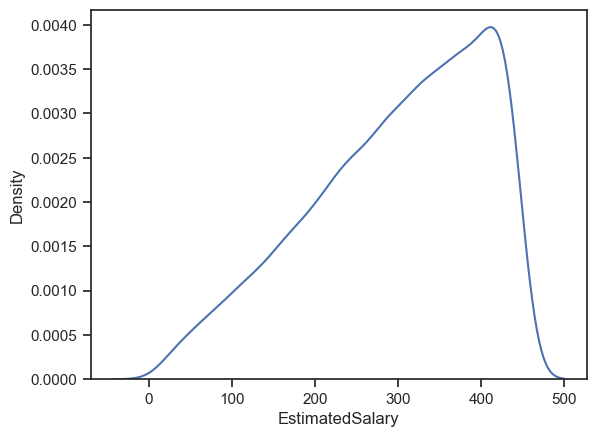

In [96]:
sns.distplot(np.sqrt(df_train.EstimatedSalary), hist=False)
#sns.distplot(np.log10(1+df_train.EstimatedSalary), hist=False)

#### StandardScaler

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [98]:
df_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'country_France', 'country_Germany', 'country_Spain', 'Surname_enc',
       'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

In [99]:
cont_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Surname_enc', 'bal_per_product'
             , 'bal_by_est_salary', 'tenure_age_ratio', 'age_surname_mean_churn']
cat_vars = ['Gender', 'HasCrCard', 'IsActiveMember', 'country_France', 'country_Germany', 'country_Spain']

In [100]:
## Scaling only continuous columns
cols_to_scale = cont_vars

In [101]:
sc_X_train = sc.fit_transform(df_train[cols_to_scale])

In [102]:
## Converting from array to dataframe and naming the respective features/columns
sc_X_train = pd.DataFrame(data = sc_X_train, columns = cols_to_scale)
sc_X_train.shape
sc_X_train.head()

(7920, 11)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Surname_enc,bal_per_product,bal_by_est_salary,tenure_age_ratio,age_surname_mean_churn
0,0.284761,-0.274383,-1.389130,0.670778,0.804059,-1.254732,-1.079210,-0.062389,0.095448,-1.232035,-1.062507
1,-0.389351,-1.128482,-0.004763,0.787860,-0.912423,1.731950,-1.079210,1.104840,-0.118834,0.525547,-1.062507
2,-0.233786,0.579716,1.379604,-1.218873,0.804059,-0.048751,0.094549,-1.100925,-0.155854,0.690966,0.193191
3,-1.426446,-0.843782,-0.004763,-1.218873,0.804059,1.094838,0.505364,-1.100925,-0.155854,0.318773,0.321611
4,-0.119706,-1.602981,-0.350855,-1.218873,0.804059,-1.244806,1.561746,-1.100925,-0.155854,0.487952,0.912973


In [103]:
## Mapping learnt on the continuous features
sc_map = {'mean':sc.mean_, 'std':np.sqrt(sc.var_)}
sc_map

{'mean': array([6.50542424e+02, 3.88912879e+01, 5.01376263e+00, 7.60258447e+04,
        1.53156566e+00, 9.96616540e+04, 2.04321788e-01, 6.24727199e+04,
        2.64665647e+00, 1.38117689e-01, 1.26136416e+00]),
 'std': array([9.64231806e+01, 1.05374237e+01, 2.88940724e+00, 6.23738902e+04,
        5.82587032e-01, 5.74167173e+04, 1.89325378e-01, 5.67456646e+04,
        1.69816787e+01, 8.95590667e-02, 1.18715858e+00])}

In [104]:
## Scaling validation and test sets by transforming the mapping obtained through the training set
sc_X_val = sc.transform(df_val[cols_to_scale])
sc_X_test = sc.transform(df_test[cols_to_scale])

In [105]:
## Converting val and test arrays to dataframes for re-usability
sc_X_val = pd.DataFrame(data = sc_X_val, columns = cols_to_scale)
sc_X_test = pd.DataFrame(data = sc_X_test, columns = cols_to_scale)

Feature scaling is important for algorithms like Logistic Regression and SVM. Not necessary for Tree-based models

### Feature selection - RFE

Features shortlisted through EDA/manual inspection and bivariate analysis :

_Age, Gender, Balance, NumOfProducts, IsActiveMember, the 3 country/Geography variables, bal per product, tenure age ratio_

Now, let's see whether feature selection/elimination through RFE (Recursive Feature Elimination) gives us the same list of features, other extra features or lesser number of features.

To begin with, we'll feed all features to RFE + LogReg model.

In [106]:
cont_vars
cat_vars

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Surname_enc',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain']

In [107]:
## Creating feature-set and target for RFE model
y = df_train['Exited'].values
#X = pd.concat([df_train[cat_vars], sc_X_train[cont_vars]], ignore_index=True, axis = 1)
X = df_train[cat_vars + cont_vars]
X.columns = cat_vars + cont_vars

In [108]:
X.columns

Index(['Gender', 'HasCrCard', 'IsActiveMember', 'country_France',
       'country_Germany', 'country_Spain', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'EstimatedSalary', 'Surname_enc',
       'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio',
       'age_surname_mean_churn'],
      dtype='object')

In [109]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [110]:
# for logistics regression
est = LogisticRegression()
num_features_to_select = 10

In [111]:
# for decision trees
est_dt = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
num_features_to_select = 10

In [112]:
# for logistics regression
rfe = RFE(estimator=est, n_features_to_select=num_features_to_select) 
rfe = rfe.fit(X.values, y)  
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True False False  True False
  True False False  True False]
[1 1 1 1 1 1 4 1 3 6 1 8 1 7 5 1 2]


In [113]:
# for decision trees
rfe_dt = RFE(estimator=est_dt, n_features_to_select=num_features_to_select) 
rfe_dt = rfe_dt.fit(X.values, y)  
print(rfe_dt.support_)
print(rfe_dt.ranking_)

[False False  True False  True False False  True False  True  True  True
 False  True  True  True  True]
[8 7 1 6 1 5 4 1 3 1 1 1 2 1 1 1 1]


In [114]:
## Logistic Regression (Linear model)
mask = rfe.support_.tolist()
selected_feats = [b for a,b in zip(mask, X.columns) if a]
selected_feats

['Gender',
 'HasCrCard',
 'IsActiveMember',
 'country_France',
 'country_Germany',
 'country_Spain',
 'Age',
 'NumOfProducts',
 'Surname_enc',
 'tenure_age_ratio']

In [115]:
## Decision Tree (Non-linear model)
mask = rfe_dt.support_.tolist()
selected_feats_dt = [b for a,b in zip(mask, X.columns) if a]
selected_feats_dt

['IsActiveMember',
 'country_Germany',
 'Age',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'bal_per_product',
 'bal_by_est_salary',
 'tenure_age_ratio',
 'age_surname_mean_churn']

### Baseline model : Logistic Regression

We'll train the linear models on the features selected through RFE

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
## Importing relevant metrics
from sklearn.metrics import roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report